# Importando Bibliotecas


In [1]:
import pandas as pd  # Trabalhar com tabelas
from scipy import stats  # Testes estatísticos
import seaborn as sns  # Criar gráficos
import matplotlib.pyplot as plt  # Criar gráficos

In [6]:
arquivos = [
    "vendas_linha_petshop_2019.csv",
    "vendas_linha_petshop_2020.csv",
    "vendas_linha_petshop_2021.csv",
    "vendas_linha_petshop_2022.csv",
]

lista_de_tabelas = []
for nome_do_arquivo in arquivos:
    tabela = pd.read_csv(nome_do_arquivo, sep=";", decimal=",", encoding="latin-1")
    lista_de_tabelas.append(tabela)  # Adiciona a tabela lida à nossa lista

df = pd.concat(lista_de_tabelas)

df["data"] = pd.to_datetime(df["data"], format="%d/%m/%Y")

colunas_numericas = ["valor", "quantidade", "valor_total_bruto", "valor_comissao", "lucro_liquido"]
for coluna in colunas_numericas:
    df[coluna] = pd.to_numeric(df[coluna], errors="coerce")

df.dropna(subset=colunas_numericas, inplace=True)


# Analisando a 'Quantidade' e os Outliers


In [ ]:
# Analisando outliers
Q1 = df["quantidade"].quantile(0.25)  # O valor que deixa 25% das vendas para trás.
Q3 = df["quantidade"].quantile(0.75)  # O valor que deixa 75% das vendas para trás.
IQR = Q3 - Q1

# Definindo um limite para o outlier
limite_superior = Q3 + 1.5 * IQR

outliers = df[df["quantidade"] > limite_superior]
print("Vendas consideradas 'fora da curva' (outliers):")
print(outliers.head())

# Calculando a variabilidade desconsiderando esses outliers
dados_sem_outliers = df[df["quantidade"] <= limite_superior]
desvio_padrao_normal = dados_sem_outliers["quantidade"].std()
print(f"O desvio padrão das vendas 'normais' é: {desvio_padrao_normal}")

Vendas consideradas 'fora da curva' (outliers):
    cod_pedido   regiao_pais                       produto  valor  quantidade  \
3            4         Norte  Biscoito  True Champion 300g   19.0         4.0   
5            6         Norte  Biscoito  True Champion 300g   19.0         4.0   
9           10  Centro Oeste  Biscoito  True Champion 300g   26.0         4.0   
10          11  Centro Oeste  Biscoito  True Champion 300g   28.0         4.0   
15          16      Nordeste  Biscoito  True Champion 300g   22.0         4.0   

    valor_total_bruto       data               estado       formapagto  \
3                88.0 2019-08-19             Rondônia  Boleto Bancário   
5                76.0 2019-09-19              Roraima    Cartão Débito   
9               104.0 2019-09-27  Mato Grosso do  Sul         Dinheiro   
10              112.0 2019-02-08     Distrito Federal         Dinheiro   
15               88.0 2019-09-27              Paraíba         Dinheiro   

   centro_distribuic

# Análise da Média de Preço


In [ ]:
media_geral_preco = df["valor"].mean()
print(f"A média de preço de todos os produtos é: R$ {media_geral_preco:.2f}")

# Comparanda a média de cada região com a média geral
for regiao in df["regiao_pais"].unique():
    precos_da_regiao = df[df["regiao_pais"] == regiao]["valor"]

    # Verificando se as médias regionais são muito diferentes da geral
    t_stat, p_valor = stats.ttest_1samp(precos_da_regiao, media_geral_preco)

    if p_valor < 0.05:
        print(f"A região {regiao} TEM uma média de preço significativamente diferente.")
    else:
        print(f"A região {regiao} NÃO TEM uma média de preço significativamente diferente.")

A média de preço de todos os produtos é: R$ 111.05
A região Norte NÃO TEM uma média de preço significativamente diferente.
A região Centro Oeste NÃO TEM uma média de preço significativamente diferente.
A região Nordeste NÃO TEM uma média de preço significativamente diferente.
A região Sudeste NÃO TEM uma média de preço significativamente diferente.
A região Sul NÃO TEM uma média de preço significativamente diferente.


# Matriz de Correlação


Matriz de Correlação:
                      valor  quantidade  valor_total_bruto  valor_comissao  \
valor              1.000000   -0.011868           0.061936        0.213321   
quantidade        -0.011868    1.000000           0.120868        0.322192   
valor_total_bruto  0.061936    0.120868           1.000000        0.264303   
valor_comissao     0.213321    0.322192           0.264303        1.000000   
lucro_liquido      0.191668    0.559976           0.262489        0.889163   

                   lucro_liquido  
valor                   0.191668  
quantidade              0.559976  
valor_total_bruto       0.262489  
valor_comissao          0.889163  
lucro_liquido           1.000000  


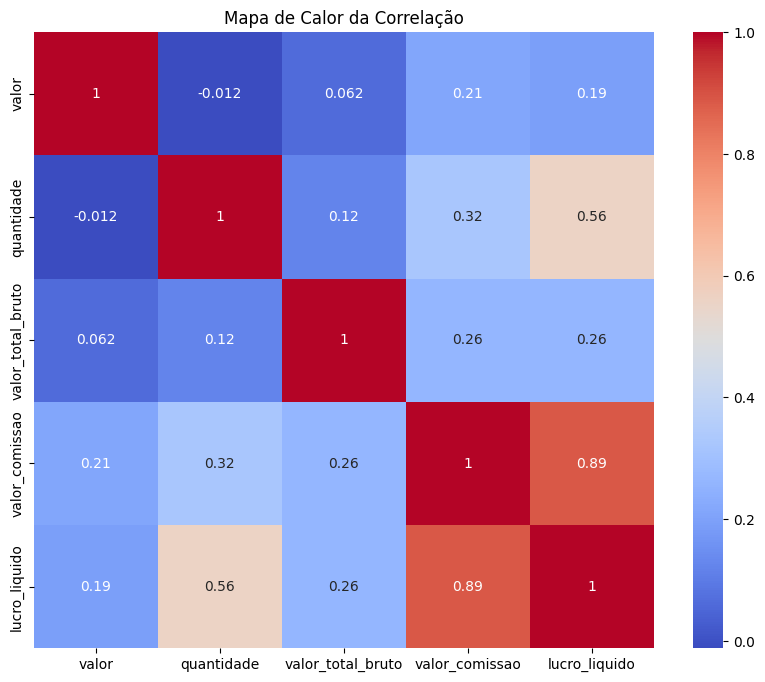

In [ ]:
colunas_para_correlacao = [
    "valor",
    "quantidade",
    "valor_total_bruto",
    "valor_comissao",
    "lucro_liquido",
]
dados_numericos = df[colunas_para_correlacao]

# Correlacionando as colunas (1 para diretamente proporcional, -1 para inversamente e 0 para nenhuma correlação)
matriz_correlacao = dados_numericos.corr()

print("Matriz de Correlação:")
print(matriz_correlacao)

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm")
plt.title("Mapa de Calor da Correlação")
plt.show()  # Exibe o gráfico.